Hw5, name: Jorge Monzon Diaz, email: jorgemd503@gmail.com

## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from mpl_toolkits.mplot3d import Axes3D

## Functions

In [2]:
#function that generates (p.size/2) x n random walk. Ex: given p=[.5, .5], rand. walk is 1-dimensional so return 1 x n matrix
def randwalk(n,p): #takes number of steps in random walk and matrix of probabilities in the formats p=[left,right],[left,right,up,down], or [left,right,up,down,forward,backwards]
    #sum(p) must == 1
    
    if np.size(p)==2: #1d
        S=np.zeros((1,n+1)) #preallocate memory
        for i in range(1,n+1):
            j=np.random.rand() #generate random number j=U[0,1)
            if j<p[0]: #if j<p[left], go left
                S[0,i]=S[0,i-1]-1
            else: #otherwise, move right
                S[0,i]=S[0,i-1]+1
                
    elif np.size(p)==4: #2d
        S=np.zeros((2,n+1)) #preallocate memory
        for i in range(1,n+1):
            j=np.random.rand() #generate random number j=U[0,1)
            if j<p[0]: #if j<p[left], go left
                S[0,i],S[1,i]=S[0,i-1]-1,S[1,i-1]
            elif j<p[0]+p[1]: #if j>=p[left] and j<p[left]+p[right], go right
                S[0,i],S[1,i]=S[0,i-1]+1,S[1,i-1]
            elif j<p[0]+p[1]+p[2]: #if j>=p[left]+p[right] and j<p[left]+p[right]+p[down], go up
                S[0,i],S[1,i]=S[0,i-1],S[1,i-1]+1
            else: #otherwise, move down
                S[0,i],S[1,i]=S[0,i-1],S[1,i-1]-1

    elif np.size(p)==6: #3d
        S=np.zeros((3,n+1)) #preallocate memory
        for i in range(1,n+1):
            j=np.random.rand() #generate random number j=U[0,1)
            if j<p[0]: #if j<p[left], go left
                S[0,i],S[1,i],S[2,i]=S[0,i-1]-1,S[1,i-1],S[2,i-1]
            elif j<p[0]+p[1]: #if j>=p[left] and j<p[left]+p[right], go right
                S[0,i],S[1,i],S[2,i]=S[0,i-1]+1,S[1,i-1],S[2,i-1]
            elif j<p[0]+p[1]+p[2]: #if j>=p[left]+p[right] and j<p[left]+p[right]+p[down], go up
                S[0,i],S[1,i],S[2,i]=S[0,i-1],S[1,i-1]+1,S[2,i-1]
            elif j<p[0]+p[1]+p[2]+p[3]: #if j>=p[left]+p[right]+p[down] and j<p[left]+p[right]+p[down]+p[forwards], go down
                S[0,i],S[1,i],S[2,i]=S[0,i-1],S[1,i-1]-1,S[2,i-1]
            elif j<p[0]+p[1]+p[2]+p[3]+p[4]: #if j>=p[left]+p[right]+p[down]+p[forwards] and j<p[left]+p[right]+p[down]+p[forwards]+p[backwards], go forwards
                S[0,i],S[1,i],S[2,i]=S[0,i-1],S[1,i-1],S[2,i-1]+1
            else: #otherwise, move backwards
                S[0,i],S[1,i],S[2,i]=S[0,i-1],S[1,i-1],S[2,i-1]-1
    return S

#function that takes in matrices of random walks and determines if/how many of those random walks return to 0
def returnCount(posmatrix, dim): #takes matrix of random walks and how many dimensions the random walks have
    count=0
    if dim==1: #for 1d random walks
        posmatrix=np.delete(posmatrix, (0), axis=1) #clear start point
        for i in range(posmatrix.shape[0]): #traverse matrix and if it a given walk reaches 0 again, count it and move to next walk
            if 0 in posmatrix[i, :]:
                count+=1
                
    elif dim==3: #for 3d random walks
        booleanpos= posmatrix==0 #create boolean position matrix, where any walk reaches 0 set to true and false otherwise
        for i in range(posmatrix.shape[0]): #check each random walk
            for j in range(posmatrix.shape[2]): #check every step in a given walk whether x==0
                if booleanpos[i,0,j]==1: #if x==0, check whether y==0, then if z==0
                    if booleanpos[i,1,j] ==1:
                        if booleanpos[i,2,j] ==1:
                            count=count+1 #if x=y=z=0, increase count and move to next walk
                            break
    return count

\pagebreak
# Problem 1

## Problem 1a: Symmetric 2d random walks

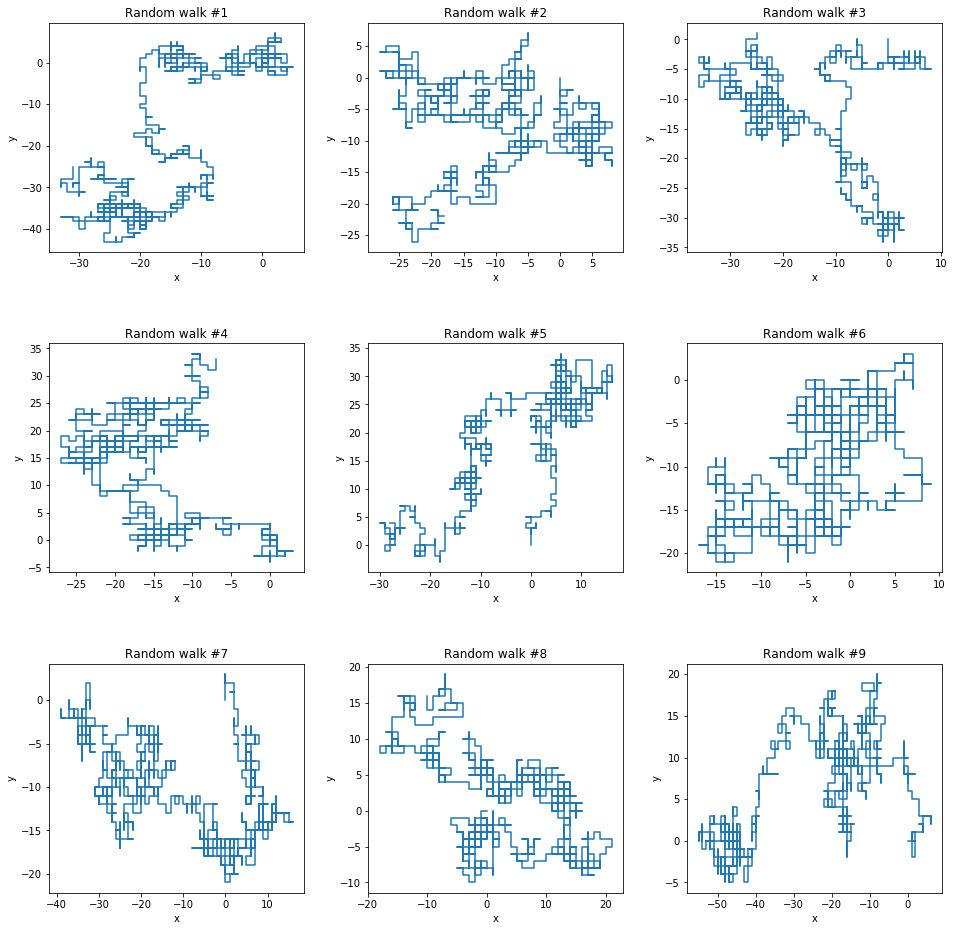

In [3]:
plt.subplots(3, 3,figsize=(16,16)) #initialize subplots
plt.subplots_adjust(hspace = .4, wspace = .25)

n=1000 #steps
p=[.25,.25,.25,.25] #left,right,up,down

for i in range(1,10): #9 trials
    plt.subplot(3,3,i) #plot/label i'th subplot
    plt.title('Random walk #' + str(i))
    plt.xlabel('x')
    plt.ylabel('y')
    
    S=randwalk(n,p) #call random walk function and plot results
    plt.plot(S[0,:],S[1,:]) 
    
plt.show()

## Problem 1b: Asymmetric 2d random walks (never moves down)

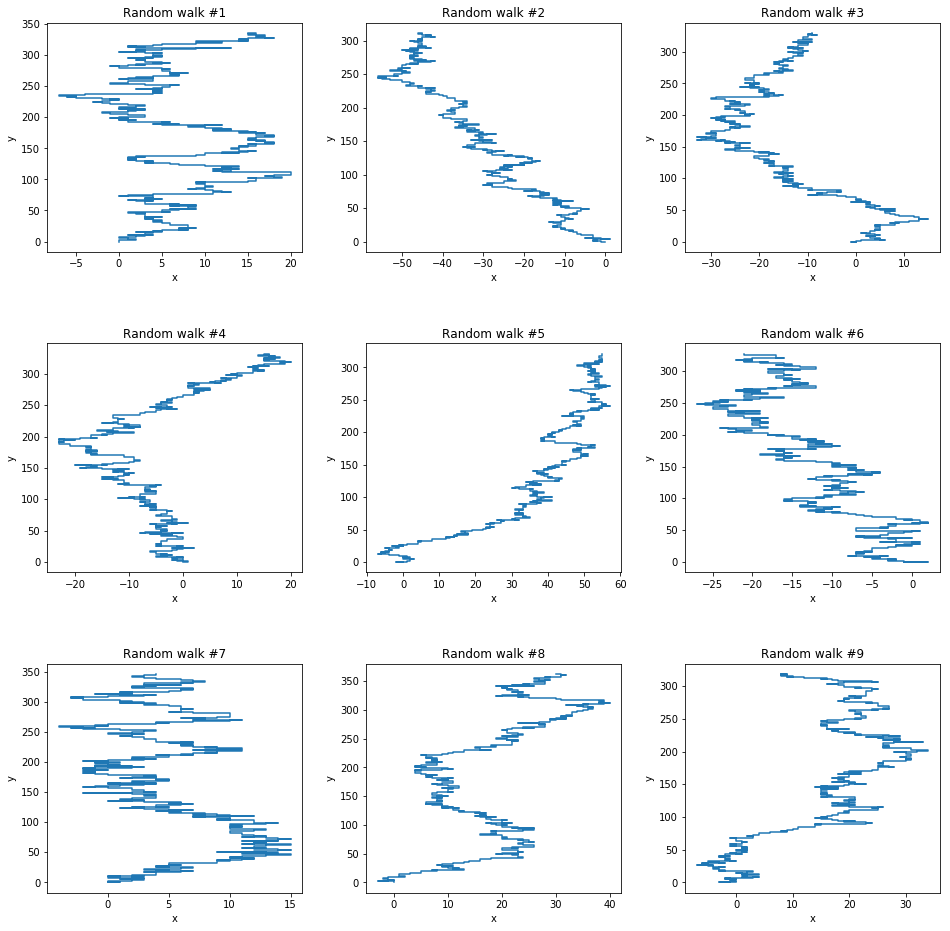

In [4]:
plt.subplots(3, 3,figsize=(16,16)) #initialize subplots
plt.subplots_adjust(hspace = .4, wspace = .25)

n=1000 #steps
p=[1/3,1/3,1/3,0] #left,right,up,down

for i in range(1,10): #9 trials
    plt.subplot(3,3,i) #plot/label i'th subplot
    plt.title('Random walk #' + str(i))
    plt.xlabel('x')
    plt.ylabel('y')
    
    S=randwalk(n,p) #call random walk function and plot results
    plt.plot(S[0,:],S[1,:]) 
    
plt.show()

## Problem 1c: Asymmetric 2d random walks (with drift)

Expected values: [-0.04000000000000001, -0.08000000000000002]


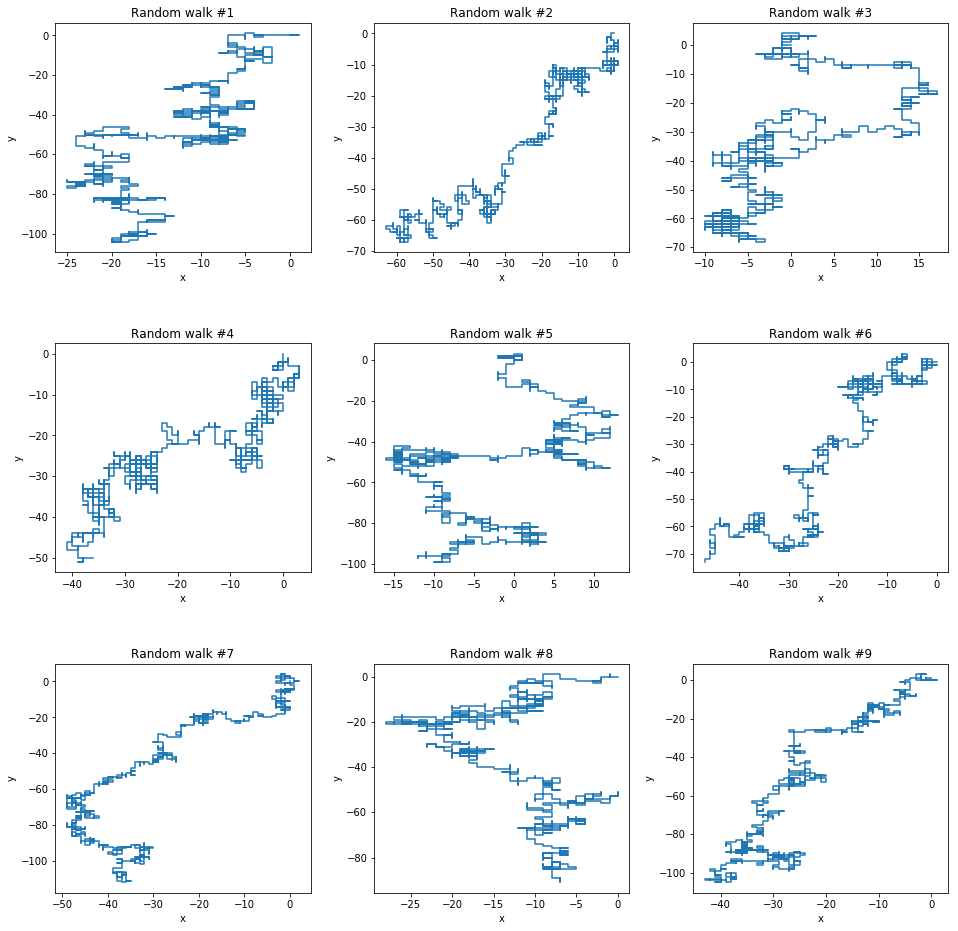

In [5]:
## Problem 1c
plt.subplots(3, 3,figsize=(16,16)) #initialize subplots
plt.subplots_adjust(hspace = .4, wspace = .25)

n=1000 #steps
p=[.22,.18,.26,.34]#left,right,up,down

for i in range(1,10): #9 trials
    plt.subplot(3,3,i) #plot/label i'th subplot
    plt.title('Random walk #' + str(i))
    plt.xlabel('x')
    plt.ylabel('y')
    
    S=randwalk(n,p) #call random walk function and plot results
    plt.plot(S[0,:],S[1,:])
    
print("Expected values:", [p[1]-p[0], p[2]-p[3]]) #compute drift: right-left, up-down
plt.show()

The expectation for each step is a direction vector $E= <-0.04 \vec{i}, -0.08 \vec{j}>$. The plots can be seen to follow this pattern graphically as the majority end $\approx -80$ on the y-axis and between $-30$ and $-60$ on the x-axis.

\pagebreak
# Problem 2

## 1d random walk, symmetric case

This case isn't required but useful to make observations with.

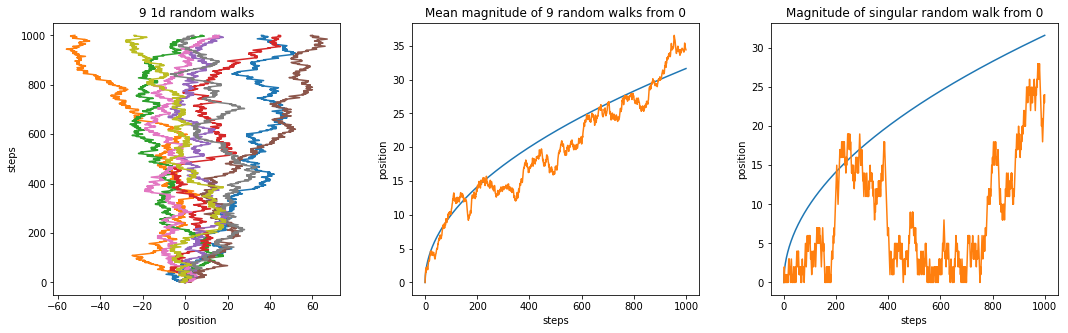

In [6]:
plt.subplots(1,2,figsize=(18,5)) #initialize subplots
plt.subplots_adjust(hspace = .4, wspace = .25)

n=1000 #steps
p=[.5,.5] #left,right
trials=9

pos=np.empty((1,n+1)) #initialize empty matrix that stores all random walks

plt.subplot(1,3,1)
plt.title(str(trials) + ' 1d random walks')
plt.xlabel('position')
plt.ylabel('steps')

for i in range(1,trials+1): #plot as many trials and store as many random walks as given
    S=randwalk(n,p) #call random walk function and plot results
    plt.plot(S[0,:],np.arange(0,n+1))
    
    pos=np.vstack([pos,S[0,:]]) #append each new random walk as a new row to position matrix
    
    
plt.subplot(1,3,2) #plot the mean magnitude of each step
plt.title('Mean magnitude of ' + str(trials) + ' random walks from 0')
plt.xlabel('steps')
plt.ylabel('position')

pos=np.delete(pos, (0), axis=0) #delete empty first row
means = np.sqrt(np.mean(pos**2,axis=0)) #compute the mean magnitude of each step from 0
plt.plot(np.arange(0,n+1),np.sqrt(np.arange(0,n+1))) #exact equation |S_n|=Sqrt(n)
plt.plot(np.arange(0,n+1),means)  #plot mean distance of each step from 0


plt.subplot(1,3,3)
plt.title('Magnitude of singular random walk from 0')
plt.xlabel('steps')
plt.ylabel('position')
plt.plot(np.arange(0,n+1),np.sqrt(np.arange(0,n+1)))
plt.plot(np.arange(0,n+1),np.abs(S[0,:]))

plt.show()

It can be seen that $|S_n|$ follows $\sqrt n$

## Problem 2a: Asymmetric 1d random walks

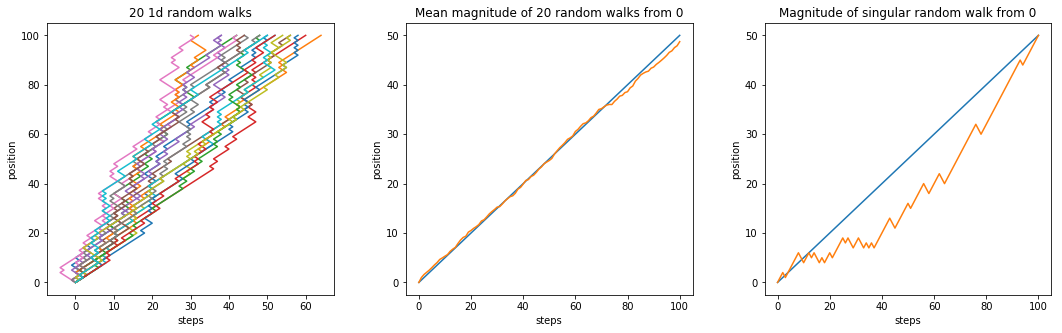

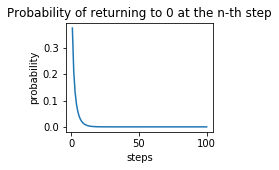

Expectation of each step: 0.5
Proportion of random walks that returned to 0 (graphed values): 0.5
Run 20 tests. Each test consisting of 20 random walks, with each of those random walks consisting of 100 steps.
Results: [0.55 0.35 0.55 0.45 0.6  0.45 0.4  0.35 0.5  0.55 0.45 0.5  0.6  0.35
 0.35 0.55 0.5  0.4  0.5  0.45 0.7 ]
Mean of results: 0.4809523809523809


In [7]:
plt.subplots(1,3,figsize=(18,5)) #initialize subplots
plt.subplots_adjust(hspace = .4, wspace = .25)


n=100 #steps
p=[.25,.75] #left,right
trials=20
pos=np.empty((1,n+1)) #initialize empty matrix that stores all random walks

plt.subplot(1,3,1)
plt.title(str(trials) + ' 1d random walks')
plt.xlabel('steps')
plt.ylabel('position')

for i in range(1,trials+1):
    S=randwalk(n,p) #call random walk function and plot results
    plt.plot(S[0,:],np.arange(0,n+1))
    
    pos=np.vstack([pos,S[0,:]]) #append each new random walk as a new row to position matrix
    

plt.subplot(1,3,2) #plot the mean magnitude of each step
plt.title('Mean magnitude of ' + str(trials) + ' random walks from 0')
plt.xlabel('steps')
plt.ylabel('position')

pos=np.delete(pos, (0), axis=0) #delete empty first row
means = np.sqrt(np.mean(pos**2,axis=0))  #compute the mean magnitude of each step from 0
y=(p[1]-p[0])*np.arange(0,n+1) #compute exact value for asymmetrical 1d |S_n|
plt.plot(np.arange(0,n+1),y) #plot exact |S_n|
plt.plot(np.arange(0,n+1),means) #plot experimental |S_n|


plt.subplot(1,3,3)
plt.title('Magnitude of singular random walk from 0')
plt.xlabel('steps')
plt.ylabel('position')
plt.plot(np.arange(0,n+1),y)
plt.plot(np.arange(0,n+1),np.abs(S[0,:]))
plt.show()

#plot probability of returning to 0 at the n-th step
fig = plt.figure(figsize=(9,2))
fig.add_subplot(1,3,1)
plt.title('Probability of returning to 0 at the n-th step')
plt.xlabel('steps')
plt.ylabel('probability')


num=np.arange(1,n+1)
y=2**(2*num[:])*gamma(num[:]+1/2)/np.sqrt(np.pi)*1/gamma(num[:]+1)*(p[0]*p[1])**num[:] #formula for P
plt.plot(np.arange(1,n+1),y)
plt.show()

print('Expectation of each step: ' + str(p[1]-p[0]))
print('Proportion of random walks that returned to 0 (graphed values): ' + str(returnCount(pos, 1)/trials))

#Run a given number of tests consisting of (#trials) of random walks each with (#steps)
tests=20
results=np.zeros(tests+1)
for i in range(np.size(results)):
    pos=np.empty((1,n+1))
    for j in range(1,trials+1):
        S=randwalk(n,p) #call random walk function and store results
        pos=np.vstack([pos,S[0,:]])

    pos=np.delete(pos, (0), axis=0) #delete empty first row
    results[i]=returnCount(pos, 1)/trials

print('Run ' + str(tests) + ' tests. Each test consisting of ' + str(trials) + ' random walks, with each of those random walks consisting of ' + str(n) + ' steps.')
print('Results: ' + str(results))
print('Mean of results: ' + str(np.mean(results)))

$${2n \choose n}=2^{2n}\frac{\Gamma(n+1/2)}{\sqrt(\pi)\Gamma(n+1)}$$

$${2n \choose n}p^nq^n=2^{2n}\frac{\Gamma(n+1/2)}{\sqrt(\pi)\Gamma(n+1)}p^{k}q^n$$

The value of $\mathbb{R}=\mathbb{P}(S_n=0$ for some $n>0)$ is computed using the exact equation $2^{2n}\frac{\Gamma(n+1/2)}{\sqrt(\pi)\Gamma(n+1)}p^{k}q^n$. This graph is seen above. It can be shown that for n steps, it gets exponentially more unlikely to return to 0.

Additionally, approximately only $\approx 0.5$ of all walks will return to 0 at some (early) step. Tests were conducted to determine this value and are the results vector printed above the graph.

This makes sense as the expectation for each step is $<.5\vec{i}>$, meaning that it is most probable to go to the left of the y-axis early on. The graph drifts to the right and the expected position vector shows it is unlikely to drift back for $n \to \infty$. The magnitude of the position vector for the random walks follow the trendline of $.5x$ as seen by the graphs above. 

\pagebreak
# Problem 3: Symmetric 3d random walk

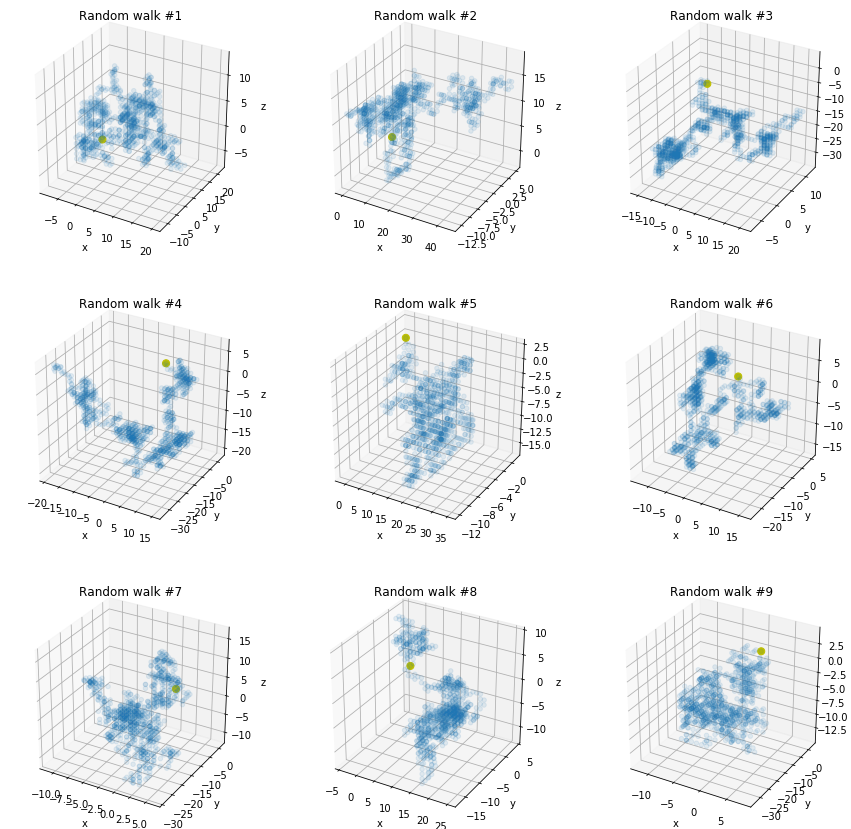

Proportion of random walks that returned to 0 (graphed values): 0.1111111111111111
Run 20 tests. Each test consisting of 30 random walks, with each of those random walks consisting of 1000 steps.
Results: [0.26666667 0.4        0.33333333 0.23333333 0.5        0.4
 0.4        0.2        0.23333333 0.33333333 0.3        0.3
 0.3        0.4        0.53333333 0.3        0.3        0.3
 0.2        0.46666667 0.3       ]
Mean of results: 0.3333333333333333


In [8]:
fig=plt.subplots(3, 3,figsize=(15,15)) #initialize subplots
plt.subplots_adjust(hspace = .2)

n=1000 #steps
p=[1/6,1/6,1/6,1/6,1/6,1/6] #left,right,up,down,forward,back
trials=9
pos=np.empty((1,n+1)) #initialize empty matrix that stores all random walks

for i in range(1,trials+1):
    ax=plt.subplot(3,3,i, projection='3d') #plot/label i'th subplot
    plt.title('Random walk #' + str(i))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    S=randwalk(n,p) #call random walk function and plot results
    ax.scatter(S[0,:], S[1,:], S[2,:],alpha=.1)
    ax.scatter(0, 0, 0,'o',c='y',s=[50,50]) #plot big yellow dot at (0,0,0) to show how the walk moves relative to it
    
    #append each new random walk as new rows to position matrix, every 3 rows is new random walk
    pos=np.vstack([pos,S[0,:]]) #append x
    pos=np.vstack([pos,S[1,:]]) #append y
    pos=np.vstack([pos,S[2,:]]) #append z
    
plt.show()

pos=np.delete(pos, (0), axis=0) #delete empty first row
pos=np.delete(pos, (0), axis=1) #clear start point
pos=np.reshape(pos,(int(pos.shape[0]/3),3,n)) #reshape position matrix into 29 matrices each containing the 3 positional vectors (x,y,z) and their respective n steps

print('Proportion of random walks that returned to 0 (graphed values): ' + str(returnCount(pos, 3)/trials))

#Run a given number of tests consisting of (#trials) of random walks each with (#steps)
tests=20
trials=30
results=np.zeros(tests+1)
for i in range(np.size(results)):
    pos=np.empty((1,n+1))
    for j in range(1,trials+1):
        S=randwalk(n,p) #call random walk function and store results
        #append each new random walk as new rows to position matrix, every 3 rows is new random walk
        pos=np.vstack([pos,S[0,:]]) #append x
        pos=np.vstack([pos,S[1,:]]) #append y
        pos=np.vstack([pos,S[2,:]]) #append z

    pos=np.delete(pos, (0), axis=0) #delete empty first row
    pos=np.delete(pos, (0), axis=1) #clear start point
    pos=np.reshape(pos,(int(pos.shape[0]/3),3,n))
    results[i]=returnCount(pos, 3)/trials

print('Run ' + str(tests) + ' tests. Each test consisting of ' + str(trials) + ' random walks, with each of those random walks consisting of ' + str(n) + ' steps.')
print('Results: ' + str(results))
print('Mean of results: ' + str(np.mean(results)))

The probability of a symmetric 3-dimensional random walk returning to 0 is $\approx.34$ (Pólya's Random Walk Constants, Wolfram MathWorld).

I ran 21 tests and the value of how many of the random walks in each test returned to 0 vs drifted too far always seemed to oscillate around $\approx .33, .34$, verifying Pólya's Constant for the 3d random walk.